In [13]:
using Plots

# Exercise 1


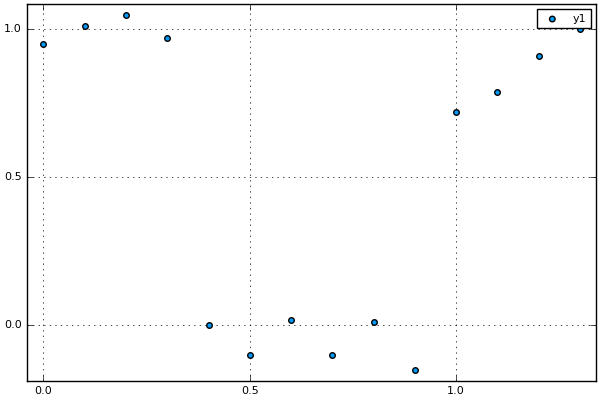

In [14]:
t = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
b = [0.95, 1.01, 1.05, 0.97, 0.0, -0.1, 0.02, -0.1, 0.01, -0.15, 0.72, 0.79, 0.91, 1.0]
scatter(t,b)

The first breakpoint should approximately be at 0.35 and the second breakpoint should approximately be at 0.95.

In [15]:
# Split the data into separate pieces.
t1 = t[1:4];   b1 = b[1:4]
t2 = t[5:10];  b2 = b[5:10]
t3 = t[11:end];b3 = b[11:end];

Generate the coefficients for the two constant constant pieces.

In [16]:
A = ones(4)
α1 = (A \ b1)[1];
A = ones(6)
α2 = (A \ b2)[1];
@printf "The first constant function is b = %f\n" α1;
@printf "The second constant function is b = %f\n" α2;

The first constant function is b = 0.995000
The second constant function is b = -0.053333


In [17]:
# Coefficients for the last piece.
A = [ones(4) t3]
α3, β3 = A \ b3
@printf "The linear function is b = %f + %ft\n" α3 β3;

The linear function is b = -0.249000 + 0.960000t



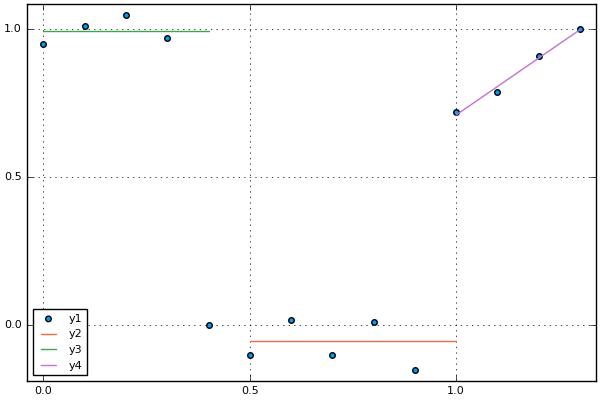

In [18]:
plot!( t->α2, 0.5,1.0 )
plot!( t->α1, 0,0.4 )
plot!( t->(α3 + β3*t), 1, 1.3)

# Exercise 2
(Boyd and Vandenberghe, 12.2)

Part a)

To make this more interesting, we'll generate some ill-conditioned matrices.

In [19]:
# Generates a random n-by-m matrix with condition number `cnd`.
function genmat(m, n, cnd)
    A = randn(m, n)
    U, S, V = svd(A)
    S[S.!=0] = linspace(cnd, 1, min(n,m))
    A = U*diagm(S)*V'
end

m, n = 20, 10
A = genmat(20, 10, 1e5)
b = randn(m);

In [20]:
# Using the Julia backslash operator
x1 = A\b

# Using transposes and inverses
x2 = inv(A'*A)*(A'*b)

# Using psudo inverses
x3 = pinv(A)*b

# Check the differences in solutions and the corresponding optimality conditions A'r = 0.
# We'll use the solution obtained via "backslash" as the reference solution.

r = b - A*x1
e = x1 - x1  # this is silly, but here for consistency.
@printf "||x1-x2|| = %20.10e  ||A'r1|| = %20.10e\n" norm(e,Inf) norm(A'*r,Inf)

r = b - A*x2
e = x1 - x2
@printf "||x1-x2|| = %20.10e  ||A'r1|| = %20.10e\n" norm(e,Inf) norm(A'*r,Inf)

r = b - A*x3
e = x1 - x3
@printf "||x1-x2|| = %20.10e  ||A'r1|| = %20.10e\n" norm(e,Inf) norm(A'*r,Inf)

||x1-x2|| =     0.0000000000e+00  ||A'r1|| =     2.3434040486e-07
||x1-x2|| =     2.8812221886e-08  ||A'r1|| =     1.8417649968e-02
||x1-x2|| =     3.2051583609e-12  ||A'r1|| =     6.3042534748e-07


Here we can see that the solutions are all fairly close to each other, except that Method 2 (using the normal equations) generates a residual that isn't very orthogonal to the range of $A$.

Part b) Here we'll test random perturbations, and report an error if the perturbation decreases the value of the least-squares residual.

In [21]:
val_opt = norm(A*x1 - b)
flag = false
for i = 1:20
    delta = randn(size(A,2))
    if norm(A*(x1 + delta) - b) ≤ val_opt
        flag = true
        break
    end
end
if flag
    println("LS not optimal!")
else
    println("LS optimal!")
end

LS optimal!


From the output above we see that perturbation does not decrease the value of the least-squares residual.

# Exercise 3
Boyd and Vanderbergh 12.3

In [22]:
A = randn(100000, 100)
b = randn(100000)

println("Time for backslash:")
@time A\b;

println("Time for normal equations:")
@time (A'*A)\(A'*b);

Time for backslash:
  1.006609 seconds (872 allocations: 77.377 MB, 2.12% gc time)
Time for normal equations:
  0.089658 seconds (19 allocations: 159.016 KB)


In this case, the normal equations are faster, but it doesn't mean it's more accurate!

# Exercise 4
Boyd and Vanderbergh 13.2

Part a)

θ1 =   3.13e+00
θ2 =   1.54e-01
rms error 0.203077



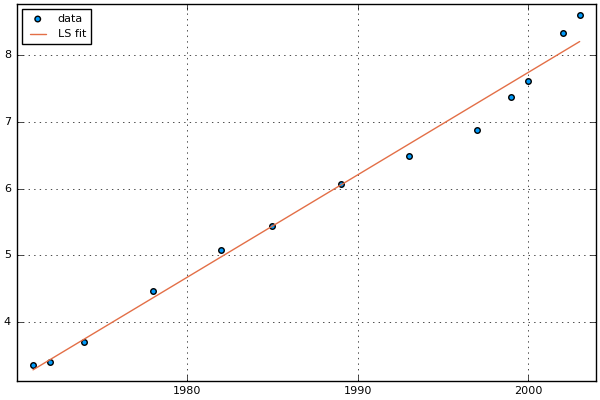

In [23]:
t = squeeze([1971 1972 1974 1978 1982 1985 1989 1993 1997 1999 2000 2002 2003],1)
N = squeeze([2250 2500 5000 29000 120000 275000 1180000 3100000 7500000 24000000 42000000 220000000 410000000],1)

treg = t - 1970
A = ones(length(treg), 2)
A[:,2] = treg
n = log10(N)
coeffs = A \ n
θ1 = coeffs[1]
θ2 = coeffs[2]

@printf "θ1 = %10.2e\n" θ1
@printf "θ2 = %10.2e\n" θ2

n̂ = A*coeffs
rms_error = norm(n̂ - n)/sqrt((length(N)))

@printf "rms error %f\n" rms_error

scatter(t, n, label="data")
plot!(t, n̂, label="LS fit")

Part b)

In [24]:
numTransModel = 10^(θ1 + θ2*(2015 - 1970))
@printf "%-40s: %10.2e\n" "Number of transistors according to model" numTransModel
numTransIBM = 4.0e+9
difference = abs(numTransModel - numTransIBM)
@printf "%-40s: %10.2e\n" "Difference between predicted and actual" difference

Number of transistors according to model:   1.14e+10
Difference between predicted and actual :   7.39e+09


According to the model, the number of transistors in 2015 would be 1.14e + 10 which is higher than the number of transistors in IBM processor. The model overestimates the number of processors by 7.39e+09 which is a significant amount!

Part c)

Let's use our model to find the number of years that it takes for the number of transistors to double.
Let there be N transistors after t1 years. Then,
logN = θ1 + t1 X θ2

Similarly, if there are 2N transistors after t2 years, then,
log2N = θ1 + t2 X θ2

After substitution,
t2 = log2/θ2 + t1
t2 = 1.95 + t1.
Hence, according to our model, the number of transistors doubles every 1.95 years which follows Moore's law stating that number of transistors doubles every 1.5 to 2 years.

Another way to solve the problem is as follows.

The gradient of our model is θ2 = 0.154. The gradient can also be interpreted as the rate of increase in logN (where N is the number of transistors) per year. We can conclude that in 2 years, rate of increase in logN = 0.154 X 2 = 0.308 and rate of increase in N = 10^0.308 = 2.03 which is slightly greater than 2.
Now consider what happens in 1.5 years. In 1.5 years, rate of increase in logN = 0.154 X 1.5 = 0.231 and rate of increase in N = 10^0.231 = 1.702 which is slightly less than 2. 
According to the model the number of transistors increases by a factor of 1.702 in 1.5 years and increases by a factor of 2.03 in 2 years.
Thus the model tells us that the number of transisters doubles every 1.5 to 2 years.
Hence we can conclude that our model very closely follows Moore's law.
